In [126]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [127]:
# Importing dataset as df
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [128]:
df.shape

(20640, 10)

In [129]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

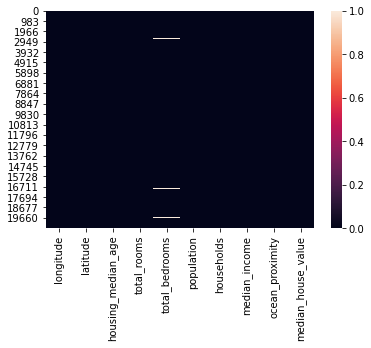

In [131]:
sb.heatmap(df.isnull(),cbar = True)

In [132]:
#Null value treatment
df.total_bedrooms = df.total_bedrooms.fillna(df.total_bedrooms.mean())

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<AxesSubplot:ylabel='ocean_proximity'>

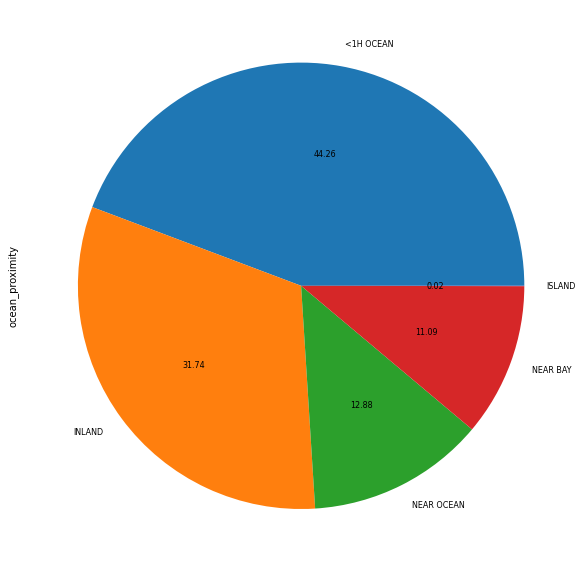

In [134]:
df["ocean_proximity"].value_counts().plot.pie(figsize = (10,15),autopct = "%.2f" ,fontsize = 8)

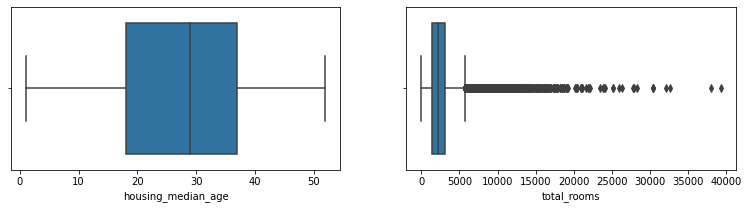

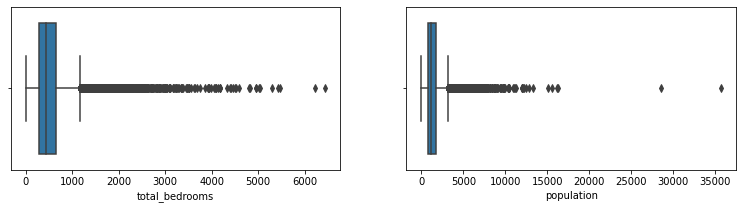

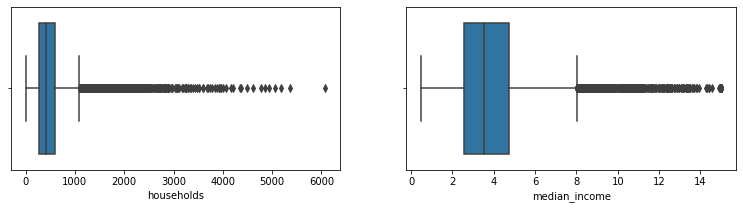

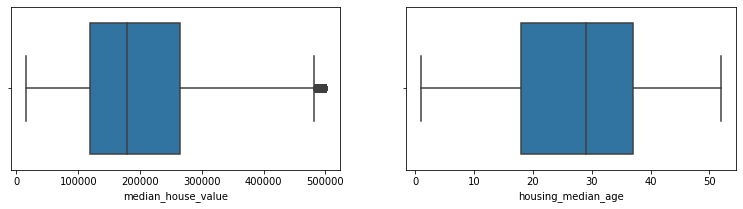

In [135]:
# representation of numerical variables by boxplot
num_cols = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value","housing_median_age"]
i=0
while i < 8:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sb.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sb.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

In [136]:
df["rooms"] = df.total_rooms+df.total_bedrooms
df1 = df.drop(columns = ["total_rooms","total_bedrooms"])
df = df1

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   ocean_proximity     20640 non-null  object 
 7   median_house_value  20640 non-null  int64  
 8   rooms               20640 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.4+ MB


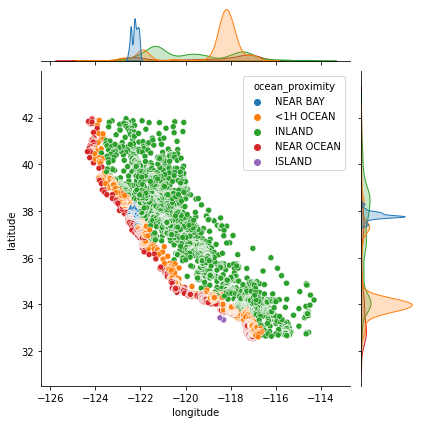

In [138]:
# Representing the area by scatter plot with respect to ocean_proximity
sb.jointplot(x = "longitude",y = "latitude",hue = "ocean_proximity",data = df)

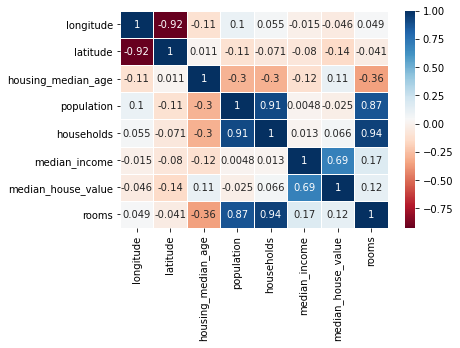

In [139]:
#heat map for correlation between variables
sb.heatmap(df.corr(), annot=True, cmap="RdBu",linewidths=0.5)
plt.show()

1. median_house_value and median_income are positively correlated
2. households and rooms are highly positively correlated.
3. population and rooms are highly postively correlated.
4. households and population are hihgly positively correlated.

In [140]:
df = pd.get_dummies(df,drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   population                  20640 non-null  int64  
 4   households                  20640 non-null  int64  
 5   median_income               20640 non-null  float64
 6   median_house_value          20640 non-null  int64  
 7   rooms                       20640 non-null  float64
 8   ocean_proximity_INLAND      20640 non-null  uint8  
 9   ocean_proximity_ISLAND      20640 non-null  uint8  
 10  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 11  ocean_proximity_NEAR OCEAN  20640 non-null  uint8  
dtypes: float64(4), int64(4), uint8(4)
memory usage: 1.3 MB


In [141]:
df.describe()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,rooms,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,1425.476744,499.539680,3.870671,206855.816909,3173.633634,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,1132.462122,382.329753,1.899822,115395.615874,2575.170984,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,3.000000,1.000000,0.499900,14999.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,787.000000,280.000000,2.563400,119600.000000,1763.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,1166.000000,409.000000,3.534800,179700.000000,2579.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,1725.000000,605.000000,4.743250,264725.000000,3782.250000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,35682.000000,6082.000000,15.000100,500001.000000,45530.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
df1 = df.drop(columns = ["longitude","latitude"])
df = df1

In [143]:
y = df['median_house_value']
X =df.drop(columns = ["median_house_value"])

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 265)

In [146]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [27]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse

69905.43751090675

In [28]:
lr.score(X_test,y_test)

0.6319786707683863

In [29]:
#defining adjusted r-square
def adj_r2(x,y,model):    
    r2 = model.score(x,y) # r-square
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1) #adjusted r-square
    return adj_r2 

In [30]:
adj_r2(X_test,y_test,lr)

0.6311743502333973

In [31]:
lr.score(X_train,y_train)

0.6314979256113069

In [32]:
adj_r2(X_train,y_train,lr)

0.6312969488406428

r-square value for training data set: 63.14%

adjusted r-square value for training data set:63.12%

r-square value for test data set:63.19%

adjusted r-square value for test data set:63.11%

rmse : 69905.43751090675

# Ridge Regression

In [33]:
#importing necessary varioables
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,101,220,219,215,210,207,208,206,205]} #hyper parameters
ridge_regress = GridSearchCV(ridge,parameters,scoring = "neg_mean_squared_error",cv = 5) #Cross validation
ridge_regress.fit(X,y) #fit the ridge regression with respect to ridge regression
print(ridge_regress.best_params_) #printing the suitable alpha value
print(ridge_regress.best_score_ )#MSE value with respect to alpha value

{'alpha': 220}
-5537420804.437614


In [34]:
# asiigning alpha value to "ridge_alpha"
ridge_alpha = 220

# fitting ridge regression
ridge_reg = Ridge(ridge_alpha)
print(ridge_reg.fit(X_train,y_train))

Ridge(alpha=220)


In [35]:
# r-square value for training set
ridge_reg.score(X_train,y_train)

0.6305648302884086

In [36]:
adj_r2(X_train,y_train,ridge_reg)

0.6303633446183441

In [37]:
# r-square value for training set
ridge_reg.score(X_test,y_test)

0.6341266290059405

In [38]:
# adjusted r-sqaure value for test set
adj_r2(X_test,y_test,ridge_reg)

0.6333270028915776

r-square value for training data set: 63.05%

adjusted r-square value for training data set:63.03%

r-square value for test data set:63.41%

adjusted r-square value for test data set:63.33%

mse : 5537420804.437614

# Lasso Regression

In [39]:
#importing necessary libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 
lasso=Lasso()

#parameters
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300,1.1,0.9,0.8,0.7,0.5,0.4,0.3,0.2,0.33]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)#cross validation

lasso_regressor.fit(X,y)#fitting the resgression
print(lasso_regressor.best_params_)#printing the suitable alpha value
print(lasso_regressor.best_score_)#MSE value with respect to alpha value

{'alpha': 300}
-5583663734.230283


In [40]:
# asiigning alpha value to "lasso_alpha"
lasso_alpha=300

# fitting lasso regression
lasso_reg = Ridge(lasso_alpha)
print(lasso_reg.fit(X_train,y_train))

Ridge(alpha=300)


In [41]:
#r-square value for training set
lasso_reg.score(X_train,y_train)

0.6299742962599462

In [42]:
#adjusted r-square value for training set
adj_r2(X_train,y_train,lasso_reg)

0.6297724885194504

In [43]:
#adjusted r-square value for training set
lasso_reg.score(X_test,y_test)

0.63432919611621

In [44]:
#adjusted r-square value for test set
adj_r2(X_test,y_test,lasso_reg)

0.6335300127177267

r-square value for training data set: 62.99%

adjusted r-square value for training data set:62.97%

r-square value for test data set:63.43%

adjusted r-square value for test data set:63.35%

mse : 5583663734.230283

# Elastic net

In [45]:
#importig necessary libararies
from sklearn.linear_model  import  ElasticNetCV
from sklearn.linear_model  import  ElasticNet
elasticCV = ElasticNetCV(alphas = None, cv =5)# Cross Validation

elasticCV.fit(X_train, y_train)

ElasticNetCV(cv=5)

In [46]:
#getting alpha value
elastic_alpha=elasticCV.alpha_
elastic_alpha

158.66793096490227

In [47]:
#fittting elasticnet regression
elasticnet_reg = ElasticNet(alpha = elastic_alpha)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=158.66793096490227)

In [48]:
#r-square value for training set
elasticnet_reg.score(X_train, y_train)

0.019206113108690914

In [49]:
#adjusted r-square value for training set
adj_r2(X_train,y_train,elasticnet_reg)

0.018671199462949706

In [50]:
#r-square value for test set
elasticnet_reg.score(X_test, y_test)

0.01958486894309286

In [51]:
#adjusted r-square value for test set
adj_r2(X_test,y_test,elasticnet_reg)

0.017442145247242413

r-square value for training data set: 1.92%

adjusted r-square value for training data set:1.86%

r-square value for test data set:1.95%

adjusted r-square value for test data set:1.74%

######  There is no much differnce in mse and r-square value of linear, lasso and ridge regression models we can conclude that model has been well trained over the training data.  
###### But elastic net is not best model for this dataset beccause r-square value is less compare to other regression models.

# Decision Tree

In [52]:
#importing the necessary libraries
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [53]:
#Decision tree
dt = DecisionTreeRegressor(random_state = 1996)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1996)

In [54]:
dt.score(X_train,y_train)

1.0

In [55]:
adj_r2(X_train,y_train,dt)

1.0

In [56]:
#prediction
dt.score(X_test,y_test)

0.4265363074729257

In [57]:
adj_r2(X_test,y_test,dt)

0.4252829871152901

In [58]:
leaves = [1,2,4,5,10,20,30,40,80,100]

In [59]:
grid_param_dt = {
    'max_features' : ['auto','log2'],
    'min_samples_leaf':leaves
}

In [60]:
grid_search = GridSearchCV(estimator=dt,param_grid=grid_param_dt,cv=5,n_jobs =-1,verbose = 3)

In [61]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [62]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_features': 'auto', 'min_samples_leaf': 30}

In [63]:
dt1 = DecisionTreeRegressor(max_features = 'auto', min_samples_leaf = 30)
dt1.fit(X_train,y_train)

DecisionTreeRegressor(max_features='auto', min_samples_leaf=30)

In [64]:
print(dt1.score(X_train,y_train))
print(dt1.score(X_test,y_test))

0.7276198756271249
0.6608882188687835


# Random Forest

In [65]:
rf = RandomForestRegressor(random_state = 1996)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=1996)

In [66]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9592215024197389
0.7152855938215277


In [67]:
leaves = [1,2,4,5,10,20,30,40,80,100]

In [68]:
grid_param = {
    'max_features' : ['auto','log2'],
    'min_samples_leaf' : range(1,10,1)
}

In [69]:
grid_search = GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [70]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_features': 'log2', 'min_samples_leaf': 2}

In [71]:
rand_reg = RandomForestRegressor(max_features = 'log2',min_samples_leaf = 2,random_state=1996)
rand_reg.fit(X_train,y_train)

RandomForestRegressor(max_features='log2', min_samples_leaf=2,
                      random_state=1996)

In [72]:
print(rand_reg.score(X_train,y_train))
print(rand_reg.score(X_test,y_test))

0.9116505972451368
0.7240934849997211


# Ada Boost

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ada =  AdaBoostRegressor(random_state = 1996)
ada.fit(X_train,y_train)

AdaBoostRegressor(random_state=1996)

In [74]:
print(ada.score(X_train,y_train))
print(ada.score(X_test,y_test))

0.47483551289603754
0.4606325983562467


In [75]:
ada.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [76]:
param_grid_ada={
   'learning_rate':[1,0.5,0.1,0.01,0.001]    
}

In [77]:
grid_ada = GridSearchCV(AdaBoostRegressor(random_state=265),param_grid_ada, verbose=3)
grid_ada.fit(X_train,y_train)
grid_ada.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................................learning_rate=1; total time=   0.5s
[CV 2/5] END ................................learning_rate=1; total time=   0.2s
[CV 3/5] END ................................learning_rate=1; total time=   0.6s
[CV 4/5] END ................................learning_rate=1; total time=   0.3s
[CV 5/5] END ................................learning_rate=1; total time=   0.5s
[CV 1/5] END ..............................learning_rate=0.5; total time=   0.6s
[CV 2/5] END ..............................learning_rate=0.5; total time=   0.5s
[CV 3/5] END ..............................learning_rate=0.5; total time=   0.9s
[CV 4/5] END ..............................learning_rate=0.5; total time=   0.7s
[CV 5/5] END ..............................learning_rate=0.5; total time=   1.0s
[CV 1/5] END ..............................learning_rate=0.1; total time=   1.1s
[CV 2/5] END ..............................learni

{'learning_rate': 0.01}

In [78]:
ada1 = AdaBoostRegressor(learning_rate = 0.01)
ada1.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.01)

In [79]:
print(ada1.score(X_train,y_train))
print(ada1.score(X_test,y_test))

0.579707869283193
0.5813065349921991


# Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state = 1996)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1996)

In [81]:
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.720312796742987
0.701234765532815


In [82]:
grid_gbr = {
    'learning_rate':[1,0.5,0.1,0.01,0.001]    
}

In [83]:
gbr1 = GridSearchCV(GradientBoostingRegressor(random_state=1996),grid_gbr, verbose=3)
gbr1.fit(X_train,y_train)
gbr1.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................................learning_rate=1; total time=   1.8s
[CV 2/5] END ................................learning_rate=1; total time=   1.8s
[CV 3/5] END ................................learning_rate=1; total time=   1.8s
[CV 4/5] END ................................learning_rate=1; total time=   2.0s
[CV 5/5] END ................................learning_rate=1; total time=   1.8s
[CV 1/5] END ..............................learning_rate=0.5; total time=   1.8s
[CV 2/5] END ..............................learning_rate=0.5; total time=   1.7s
[CV 3/5] END ..............................learning_rate=0.5; total time=   1.8s
[CV 4/5] END ..............................learning_rate=0.5; total time=   1.8s
[CV 5/5] END ..............................learning_rate=0.5; total time=   1.8s
[CV 1/5] END ..............................learning_rate=0.1; total time=   2.1s
[CV 2/5] END ..............................learni

{'learning_rate': 0.5}

In [84]:
gbr1 = GradientBoostingRegressor(random_state = 1996,learning_rate = 0.5)
gbr1.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.5, random_state=1996)

In [85]:
print(gbr1.score(X_train,y_train))
print(gbr1.score(X_test,y_test))

0.7718461137928089
0.7057936972945578


# XG Boost

In [86]:
from xgboost import XGBRegressor
xg = XGBRegressor(random_state = 1996)
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1996,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
print(xg.score(X_train,y_train))
print(xg.score(X_test,y_test))

0.8646615511023308
0.7119598933745016


In [88]:
grid_xg = {
    "learning_rate":[1,0.5,0.1,0.01,0.001]
}

In [89]:
xg1 = GridSearchCV(xg,grid_xg,verbose = 3)
xg1.fit(X_train,y_train)
xg1.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................................learning_rate=1; total time=   0.9s
[CV 2/5] END ................................learning_rate=1; total time=   1.0s
[CV 3/5] END ................................learning_rate=1; total time=   1.0s
[CV 4/5] END ................................learning_rate=1; total time=   0.9s
[CV 5/5] END ................................learning_rate=1; total time=   0.9s
[CV 1/5] END ..............................learning_rate=0.5; total time=   0.9s
[CV 2/5] END ..............................learning_rate=0.5; total time=   1.0s
[CV 3/5] END ..............................learning_rate=0.5; total time=   0.9s
[CV 4/5] END ..............................learning_rate=0.5; total time=   0.9s
[CV 5/5] END ..............................learning_rate=0.5; total time=   0.9s
[CV 1/5] END ..............................learning_rate=0.1; total time=   0.9s
[CV 2/5] END ..............................learni

{'learning_rate': 0.1}

In [90]:
xg1 = XGBRegressor(learning_rate = 0.1,random_state = 1996)
xg1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1996,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
print(xg1.score(X_train,y_train))
print(xg1.score(X_test,y_test))

0.809525039408765
0.7217657198952289


# KNN

In [92]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [93]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.7819491534939941
0.6809971755304314


In [94]:
grid_knn = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [95]:
knn1 = GridSearchCV(knn,grid_knn,verbose = 3)
knn1.fit(X_train,y_train)
knn1.best_params_

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.6s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.6s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.6s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.6s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.6s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.6s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.6s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.6s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.7s
[CV 2/5] END algorithm=ball_tree, l

[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.7s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.6s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.6s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.6s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=10; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.7s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.9s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.6s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.6s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=11; total time=   0.6s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=12; total time=   0.7s
[CV 2

[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=13; total time=   1.2s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.9s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.9s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.7s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.8s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=3; total time=   0.8s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.8s
[CV 2/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.7s
[CV 3/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.7s
[CV 4/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   0.8s
[CV 5/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=5; total time=   1.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=32, n_neighbors=7; total time=   0.8s
[CV 2/5] END al

[CV 5/5] END .algorithm=kd_tree, leaf_size=18, n_neighbors=9; total time=   0.5s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.5s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.3s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.4s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.5s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=10; total time=   0.3s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   1.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.6s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.3s
[CV 4/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.3s
[CV 5/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=11; total time=   0.3s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=12; total time=   0.4s
[CV 2/5] END algorithm=kd_tr

[CV 2/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=3; total time=   0.3s
[CV 3/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=3; total time=   0.2s
[CV 4/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=3; total time=   0.2s
[CV 5/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=3; total time=   0.3s
[CV 1/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.3s
[CV 2/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.3s
[CV 3/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.4s
[CV 4/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.3s
[CV 5/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=5; total time=   0.3s
[CV 1/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.3s
[CV 2/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.3s
[CV 3/5] END .algorithm=kd_tree, leaf_size=27, n_neighbors=7; total time=   0.3s
[CV 4/5] END .algorithm=kd_t

[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10; total time=   0.3s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=10; total time=   0.3s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11; total time=   0.3s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11; total time=   0.3s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11; total time=   0.3s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11; total time=   0.4s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=11; total time=   0.3s
[CV 1/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.3s
[CV 2/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.3s
[CV 3/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.3s
[CV 4/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.3s
[CV 5/5] END algorithm=kd_tree, leaf_size=32, n_neighbors=12; total time=   0.3s
[CV 1/5] END algorithm=kd_tr

[CV 1/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   1.2s
[CV 2/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   1.1s
[CV 3/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   1.1s
[CV 4/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   1.2s
[CV 5/5] END ...algorithm=brute, leaf_size=20, n_neighbors=5; total time=   1.1s
[CV 1/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   1.1s
[CV 2/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   1.1s
[CV 3/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   1.1s
[CV 4/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   1.1s
[CV 5/5] END ...algorithm=brute, leaf_size=20, n_neighbors=7; total time=   1.1s
[CV 1/5] END ...algorithm=brute, leaf_size=20, n_neighbors=9; total time=   1.1s
[CV 2/5] END ...algorithm=brute, leaf_size=20, n_neighbors=9; total time=   1.0s
[CV 3/5] END ...algorithm=br

[CV 3/5] END ..algorithm=brute, leaf_size=27, n_neighbors=11; total time=   1.1s
[CV 4/5] END ..algorithm=brute, leaf_size=27, n_neighbors=11; total time=   1.1s
[CV 5/5] END ..algorithm=brute, leaf_size=27, n_neighbors=11; total time=   1.0s
[CV 1/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   1.1s
[CV 2/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   1.1s
[CV 3/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   1.0s
[CV 4/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   1.1s
[CV 5/5] END ..algorithm=brute, leaf_size=27, n_neighbors=12; total time=   1.0s
[CV 1/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   1.0s
[CV 2/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   1.2s
[CV 3/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   1.1s
[CV 4/5] END ..algorithm=brute, leaf_size=27, n_neighbors=13; total time=   1.1s
[CV 5/5] END ..algorithm=bru

[CV 5/5] END ...algorithm=brute, leaf_size=34, n_neighbors=5; total time=   1.0s
[CV 1/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   1.0s
[CV 2/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   1.0s
[CV 3/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   1.1s
[CV 4/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   1.1s
[CV 5/5] END ...algorithm=brute, leaf_size=34, n_neighbors=7; total time=   1.2s
[CV 1/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   1.0s
[CV 2/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   1.0s
[CV 3/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   1.0s
[CV 4/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   1.0s
[CV 5/5] END ...algorithm=brute, leaf_size=34, n_neighbors=9; total time=   1.0s
[CV 1/5] END ..algorithm=brute, leaf_size=34, n_neighbors=10; total time=   1.0s
[CV 2/5] END ..algorithm=bru

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [96]:
knn1 = KNeighborsRegressor(algorithm = 'ball_tree',leaf_size = 18, n_neighbors = 13)
knn1.fit(X_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, n_neighbors=13)

In [97]:
print(knn1.score(X_train,y_train))
print(knn1.score(X_test,y_test))

0.7345473788580623
0.6986890437349453


# Stacking

In [103]:
train,val_train,test,val_test = train_test_split(X,y, test_size = 0.5,random_state = 265)

In [104]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(train,test,test_size = 0.2,random_state = 265)

In [105]:
### Linear Regression model
lr.fit(x_train1,y_train1)


### Decision Tree model
dt.fit(x_train1,y_train1)

DecisionTreeRegressor(random_state=1996)

In [106]:
predicted_val1 = lr.predict(val_train)
predicted_val2 = dt.predict(val_train)


predict_val = np.column_stack((predicted_val1,predicted_val2))
predict_val

array([[253680.79446612, 417900.        ],
       [332123.04515539, 410000.        ],
       [186924.0929882 , 260700.        ],
       ...,
       [ 92932.2827862 , 170700.        ],
       [215304.39450367, 135800.        ],
       [149049.01835226,  75000.        ]])

In [107]:
predicted_test1 = lr.predict(x_test1)
predicted_test2 = dt.predict(x_test1)


predict_test = np.column_stack((predicted_test1,predicted_test2))
predict_test

array([[143543.4342366 ,  68500.        ],
       [242953.22633337, 183800.        ],
       [ 40725.70522865,  68300.        ],
       ...,
       [101918.65044633, 208300.        ],
       [130627.68153495,  71800.        ],
       [177951.94686027, 350000.        ]])

In [108]:
## Random Forest Model
rand_reg = RandomForestRegressor()
rand_reg.fit(predict_val,val_test)
print(rand_reg.score(predict_val,val_test))
print(rand_reg.score(predict_test,y_test1))

0.946538695947223
0.6151903028754167


###########################################################################################################################

In [109]:
### Linear Regression model
print(knn1.fit(x_train1,y_train1))


### Decision Tree model
print(rand_reg.fit(x_train1,y_train1))

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, n_neighbors=13)
RandomForestRegressor()


In [110]:
predicted_val11 = knn1.predict(val_train)
predicted_val21= rand_reg.predict(val_train)


predict_val1 = np.column_stack((predicted_val11,predicted_val21))
predict_val1

array([[262377.15384615, 264499.07      ],
       [190546.15384615, 364119.08      ],
       [208715.38461538, 154710.        ],
       ...,
       [191007.69230769, 110793.        ],
       [256561.53846154, 181404.01      ],
       [251200.15384615, 104645.        ]])

In [111]:
predicted_test11 = knn1.predict(x_test1)
predicted_test21 = rand_reg.predict(x_test1)


predict_test1 = np.column_stack((predicted_test11,predicted_test21))
predict_test1

array([[281654.        , 113997.        ],
       [138584.61538462, 200660.        ],
       [231684.69230769,  70246.        ],
       ...,
       [185961.61538462, 162416.        ],
       [240707.69230769, 117097.        ],
       [199661.61538462, 192881.01      ]])

In [112]:
xg1 = XGBRegressor()
xg1.fit(predict_val,val_test)
print(xg1.score(predict_val1,val_test))
print(xg1.score(predict_test1,y_test1))

0.33252220777469066
0.36725800831824573


###########################################################################################################################

In [113]:
### Linear Regression model
print(gbr1.fit(x_train1,y_train1))


### Decision Tree model
print(ada1.fit(x_train1,y_train1))

GradientBoostingRegressor(learning_rate=0.5, random_state=1996)
AdaBoostRegressor(learning_rate=0.01)


In [114]:
predicted_val21 = gbr1.predict(val_train)
predicted_val22 = ada1.predict(val_train)


predict_val3 = np.column_stack((predicted_val21,predicted_val22))
predict_val3

array([[267294.88111112, 185949.88670166],
       [330987.93277762, 306514.29161604],
       [161376.59924769, 175707.12485549],
       ...,
       [108097.21357758, 137306.19174549],
       [154813.55226826, 232494.83290011],
       [159878.29240546, 175707.12485549]])

In [115]:
predicted_test21 = gbr1.predict(x_test1)
predicted_test22 = ada1.predict(x_test1)


predict_test3 = np.column_stack((predicted_test21,predicted_test22))
predict_test3

array([[123736.40467843, 139214.48708487],
       [198347.97200609, 240767.65811623],
       [ -8669.29158302,  92178.54491463],
       ...,
       [161016.25812045, 139657.1833785 ],
       [109068.57037333, 140784.63701707],
       [188166.19612678, 175707.12485549]])

In [116]:
xg1 = XGBRegressor()
xg1.fit(predict_val3,val_test)
print(xg1.score(predict_val3,val_test))
print(xg1.score(predict_test3,y_test1))

0.8107216211124059
0.6982645682400026


In [117]:
### Linear Regression model
print(knn.fit(x_train1,y_train1))


### Decision Tree model
print(xg.fit(x_train1,y_train1))

KNeighborsRegressor()
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1996,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [118]:
predicted_val31 = knn.predict(val_train)
predicted_val32 = xg.predict(val_train)


predict_val4 = np.column_stack((predicted_val31,predicted_val32))
predict_val4

array([[259540.4      , 272125.15625  ],
       [170980.       , 330819.09375  ],
       [144100.       , 177093.859375 ],
       ...,
       [194520.       , 105606.1953125],
       [212400.       , 161669.671875 ],
       [258580.2      , 170077.3125   ]])

In [119]:
predicted_test31 = knn.predict(x_test1)
predicted_test32 = xg.predict(x_test1)


predict_test4 = np.column_stack((predicted_test31,predicted_test32))
predict_test4

array([[247720.       , 113844.328125 ],
       [144760.       , 192760.734375 ],
       [244800.2      ,  38766.8125   ],
       ...,
       [249640.2      , 181798.90625  ],
       [225080.       , 116828.7265625],
       [149140.       , 160628.109375 ]])

In [120]:
rf_1 = RandomForestRegressor()
rf_1.fit(predict_val4,val_test)
print(rf_1.score(predict_val4,val_test))
print(rf_1.score(predict_test4,y_test1))

0.9508680261655668
0.6688269139525542


In [121]:
predict_val5 = np.column_stack((predicted_val1,predicted_val2,
                                  predicted_val11,predicted_val21,
                                  predicted_val21,predicted_val22))
predict_val5

array([[253680.79446612, 417900.        , 262377.15384615,
        267294.88111112, 267294.88111112, 185949.88670166],
       [332123.04515539, 410000.        , 190546.15384615,
        330987.93277762, 330987.93277762, 306514.29161604],
       [186924.0929882 , 260700.        , 208715.38461538,
        161376.59924769, 161376.59924769, 175707.12485549],
       ...,
       [ 92932.2827862 , 170700.        , 191007.69230769,
        108097.21357758, 108097.21357758, 137306.19174549],
       [215304.39450367, 135800.        , 256561.53846154,
        154813.55226826, 154813.55226826, 232494.83290011],
       [149049.01835226,  75000.        , 251200.15384615,
        159878.29240546, 159878.29240546, 175707.12485549]])

In [122]:
predict_test5 = np.column_stack((predicted_test1,predicted_test2,
                                  predicted_test11,predicted_test21,
                                  predicted_test21,predicted_test22
                                ))
predict_test5

array([[143543.4342366 ,  68500.        , 281654.        ,
        123736.40467843, 123736.40467843, 139214.48708487],
       [242953.22633337, 183800.        , 138584.61538462,
        198347.97200609, 198347.97200609, 240767.65811623],
       [ 40725.70522865,  68300.        , 231684.69230769,
         -8669.29158302,  -8669.29158302,  92178.54491463],
       ...,
       [101918.65044633, 208300.        , 185961.61538462,
        161016.25812045, 161016.25812045, 139657.1833785 ],
       [130627.68153495,  71800.        , 240707.69230769,
        109068.57037333, 109068.57037333, 140784.63701707],
       [177951.94686027, 350000.        , 199661.61538462,
        188166.19612678, 188166.19612678, 175707.12485549]])

In [123]:
rf_2 = RandomForestRegressor()
rf_2.fit(predict_val5,val_test)
print(rf_2.score(predict_val5,val_test))
print(rf_2.score(predict_test5,y_test1))

0.9567370641403263
0.7076211669392586


###### Conclusion: Gradient Boosting model has been well trained over the data as compare to other models.